# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定

## （1）因子1：ROC20，20日变动速率(20-day Price Rate of Change). 是一个动能指标，其以当日的收盘价和N天前的收盘价比较，通过计算股价某一段时间内收盘价变动的比例，应用价格的移动比较来测量价位动量

In [661]:
import warnings
warnings.filterwarnings('ignore')

from time import time

from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()

## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq':'8H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

In [662]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()
dv1H.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [663]:
import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, ROC, ROC_MA1, ROC_MA2, chart_name='dv_alpha', n=0):
    fig,(ax,ax1,ax2) = plt.subplots(3,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b')
    ax1.plot(ROC.iloc[n:], alpha=1)
    ax2.plot(ROC_MA1.iloc[n:], alpha=1)
    ax2.plot(ROC_MA2.iloc[n:], alpha=3)
    plt.show()

In [664]:
dv1H.add_formula('ROC20', '((close/Delay(close,20))-1)*100' , add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601080000,NaN
20180601160000,NaN
20180602000000,NaN
20180602080000,NaN
20180602160000,NaN
20180603000000,NaN
20180603080000,NaN
20180603160000,NaN


In [849]:
roc20_ma1 = dv1H.add_formula('roc20_ma1', 'Ts_Mean(ROC20,5)',add_data=True)
roc20_ma2 = dv1H.add_formula('roc20_ma2', 'Ts_Mean(ROC20,25)', add_data=True)

Field [roc20_ma1] is overwritten.
Field [roc20_ma2] is overwritten.


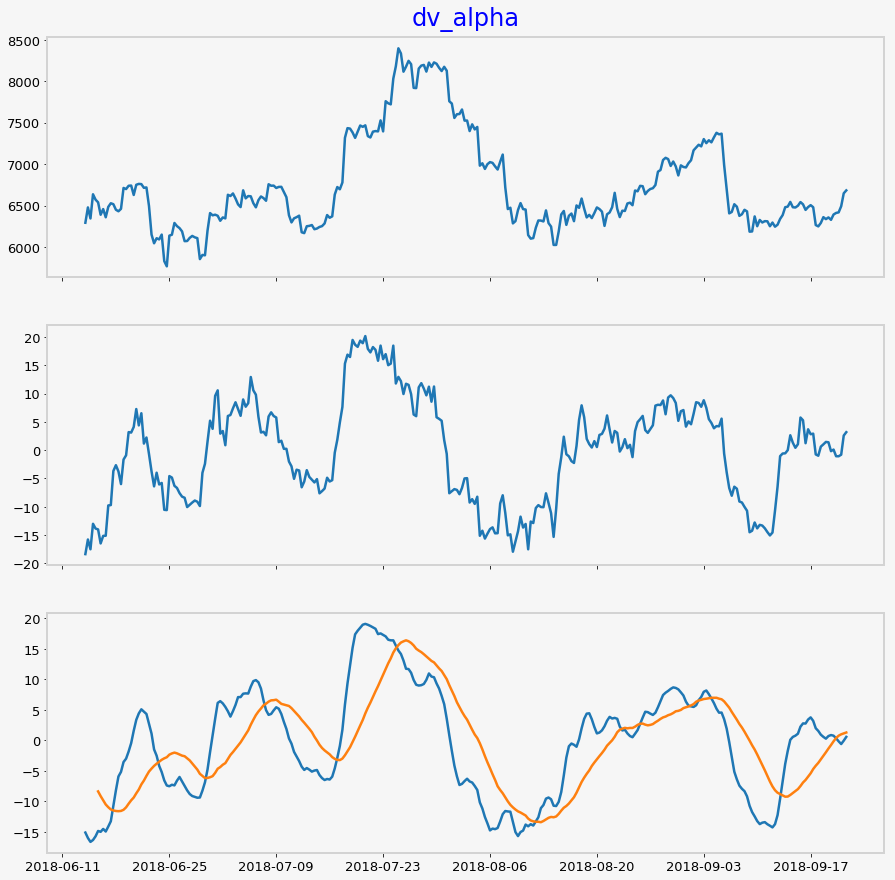

In [850]:
roc = dv1H.get_ts('ROC20', date_type='datetime')
roc20_ma1 = dv1H.get_ts('roc20_ma1', date_type='datetime')
roc20_ma2 = dv1H.get_ts('roc20_ma2', date_type='datetime')

Plot_Mean(dv1H, roc.iloc[:,0], roc20_ma1.iloc[:,0], roc20_ma2.iloc[:,0], n=-300)

### 对比BTCUSDT 8H收盘价与其ROC20指标的图表，发现ROC20与标的物价格图在趋势上能够部分吻合，主要表现为ROC20几乎领先或与标的物价格变动趋势一致；对ROC20进行短期和长期（5日、25日）MA处理，通过ROC20指标的短期和长期MA的组合来确定进出场时机。当短期MA上穿长期时，作为多单信号；短期MA下穿长期时，为空单信号。

## （2）因子2：alpha191 - alpha27，wma

In [684]:
dv1H.add_formula("alpha27","Ta('WMA',0,0,0,0,(close-Delay(close,3))/Delay(close,3)*100+(close-Delay(close,6))/Delay(close,6)*100,0,12)",add_data=True)

symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601080000,NaN
20180601160000,NaN
20180602000000,NaN
20180602080000,NaN
20180602160000,NaN
20180603000000,NaN
20180603080000,NaN
20180603160000,NaN


In [847]:
a27_ma1 = dv1H.add_formula('a27_ma1', 'Ts_Mean(alpha27,5)',add_data=True)
a27_ma2 = dv1H.add_formula('a27_ma2', 'Ts_Mean(alpha27,30)', add_data=True)

Field [a27_ma1] is overwritten.
Field [a27_ma2] is overwritten.


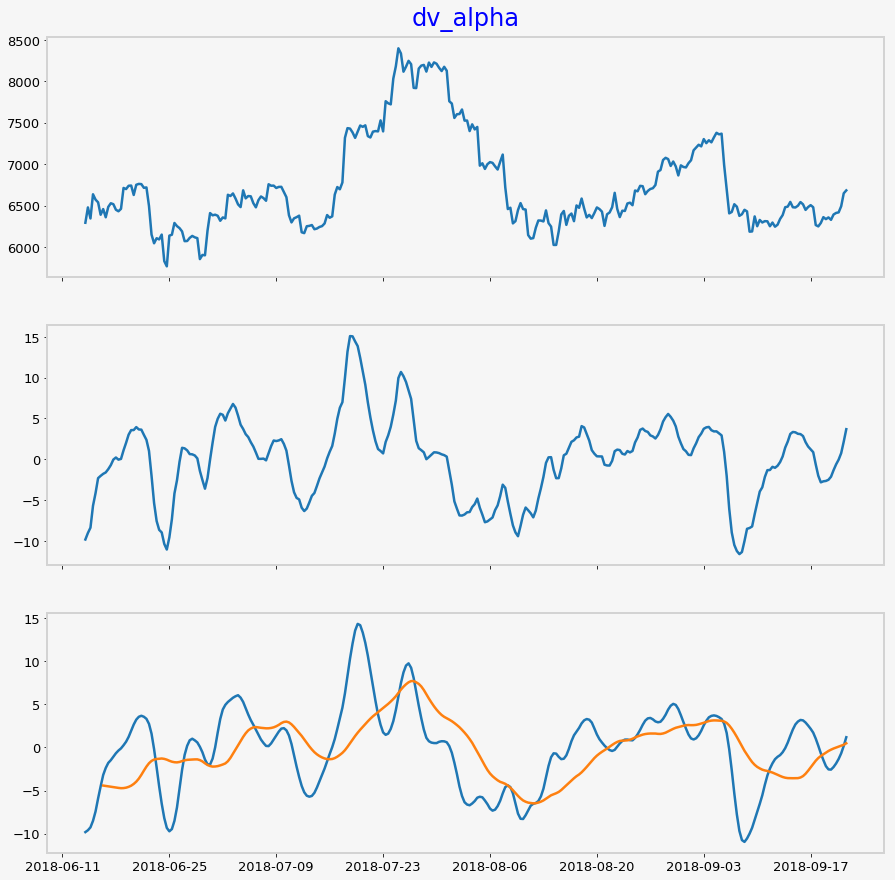

In [848]:
a27 = dv1H.get_ts('alpha27', date_type='datetime')
a27_ma1 = dv1H.get_ts('a27_ma1', date_type='datetime')
a27_ma2 = dv1H.get_ts('a27_ma2', date_type='datetime')

Plot_Mean(dv1H, a27.iloc[:,0], a27_ma1.iloc[:,0], a27_ma2.iloc[:,0], n=-300)

### 根据标的物价格图以及alpha27因子的变动可知，我们仍可以对alpha27因子做短期长期（5日、30日）均线处理，进而来判断入场信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

### （1）ROC20因子与价格图的联系比较简单且直接，即ROC20因子有一定的领先趋势，会在一定程度先于标的价格图发生同向变动，故我们可以通过对ROC20因子设置短期（5日、25日）的MA金叉死叉策略来对BTCUSDT的多空进行有效预测并套利，假设的信号为金叉买入、死叉卖出；

### （2）alpha27因子与ROC因子较为相似，都具有一定的预测标的物走势的能力，故对alpha27因子设置短期、长期（5日、30日）的MA，金叉死叉策略作为假设信号。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来

### （1）ROC20因子

In [840]:
dv1H.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

# 进场信号

long = dv1H.add_formula("longROC20","If((Ts_Mean(ROC20,5)>Ts_Mean(ROC20,25)) && (Delay(Ts_Mean(ROC20,5),1)<=Delay(Ts_Mean(ROC20,25),1)),2,0)", add_data=True)
short = dv1H.add_formula("shortROC20","If((Ts_Mean(ROC20,5)<Ts_Mean(ROC20,25)) && (Delay(Ts_Mean(ROC20,5),1)>=Delay(Ts_Mean(ROC20,25),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongROC20","If(shortROC20==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortROC20","If(longROC20==2,-1,0)", add_data=True)

Field [ROC20] is overwritten.
Field [longROC20] is overwritten.
Field [shortROC20] is overwritten.
Field [closeLongROC20] is overwritten.
Field [closeShortROC20] is overwritten.


In [841]:
dv1H.get_ts('longROC20').stack()[dv1H.get_ts('longROC20').stack()==2].tail()

trade_date      symbol         
20180717000000  BTCUSDT:binance    2.0
20180812000000  BTCUSDT:binance    2.0
20180826000000  BTCUSDT:binance    2.0
20180902080000  BTCUSDT:binance    2.0
20180913080000  BTCUSDT:binance    2.0
dtype: float64

In [842]:
from jaqs_fxdayu.research import TimingDigger

tdMa = TimingDigger(output_folder=".", output_format='pdf',signal_name='Ma')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [843]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha1 = TimingDigger(output_folder=".", output_format='pdf',signal_name='ROC20')

TimingSignal(tdAlpha1, dv1H,'longROC20','shortROC20','closeLongROC20','closeShortROC20', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%


In [844]:
tdAlpha1.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              1.929 -1.391  1.292
p-value             0.126  0.397  0.244
mean                0.082 -0.037  0.048
std                 0.085  0.027  0.090
info_ratio          0.965 -1.391  0.528
skewness            1.216  0.000  1.146
kurtosis           -0.143 -2.000  0.516
pct5                0.015 -0.061 -0.048
pct25               0.017 -0.050  0.002
pct50               0.053 -0.037  0.017
pct75               0.079 -0.024  0.066
pct95               0.211 -0.013  0.194
occurance           5.000  2.000  7.000
win_ratio             NaN    NaN  0.714
win_mean/loss_mean    NaN    NaN  2.208


In [845]:
tdAlpha1.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              1.800 -2.620  1.038
p-value             0.214  0.120  0.347
mean                0.121 -0.028  0.047
std                 0.095  0.015  0.101
info_ratio          1.273 -1.852  0.464
skewness            0.107  0.439  1.007
kurtosis           -1.500 -1.500 -0.490
pct5                0.019 -0.042 -0.040
pct25               0.061 -0.038 -0.026
pct50               0.114 -0.032  0.000
pct75               0.178 -0.020  0.088
pct95               0.228 -0.010  0.209
occurance           3.000  3.000  6.000
win_ratio             NaN    NaN  0.500
win_mean/loss_mean    NaN    NaN  4.398


In [846]:
tdAlpha1.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                      win   loss     all
t-stat              2.811 -2.997   1.718
p-value             0.026  0.040   0.112
mean                0.096 -0.031   0.047
std                 0.091  0.021   0.095
info_ratio          1.063 -1.499   0.496
skewness            0.737 -0.270   1.074
kurtosis           -1.051 -1.307  -0.024
pct5                0.010 -0.059  -0.051
pct25               0.017 -0.043  -0.010
pct50               0.066 -0.032   0.014
pct75               0.146 -0.010   0.079
pct95               0.243 -0.008   0.242
occurance           8.000  5.000  13.000
win_ratio             NaN    NaN   0.615
win_mean/loss_mean    NaN    NaN   3.080


### （2）alpha27

In [857]:
# 进场信号
long = dv1H.add_formula("longa27","If((Ts_Mean(alpha27,5)>Ts_Mean(alpha27,30)) && (Delay(Ts_Mean(alpha27,5),1)<=Delay(Ts_Mean(alpha27,30),1)),2,0)", add_data=True)
short = dv1H.add_formula("shorta27","If((Ts_Mean(alpha27,5)<Ts_Mean(alpha27,30)) && (Delay(Ts_Mean(alpha27,5),1)>=Delay(Ts_Mean(alpha27,30),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLonga27","If(shorta27==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShorta27","If(longa27==2,-1,0)", add_data=True)

Field [longa27] is overwritten.
Field [shorta27] is overwritten.
Field [closeLonga27] is overwritten.
Field [closeShorta27] is overwritten.


In [858]:
dv1H.get_ts('longa27').stack()[dv1H.get_ts('longa27').stack()==2].tail()

trade_date      symbol         
20180823160000  BTCUSDT:binance    2.0
20180825080000  BTCUSDT:binance    2.0
20180903080000  BTCUSDT:binance    2.0
20180911160000  BTCUSDT:binance    2.0
20180921160000  BTCUSDT:binance    2.0
dtype: float64

In [859]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha3 = TimingDigger(output_folder=".", output_format='pdf',signal_name='alpha191_alpha27')

TimingSignal(tdAlpha3, dv1H,'longa27','shorta27','closeLonga27','closeShorta27', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%


In [860]:
tdAlpha3.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              2.031 -1.608  1.016
p-value             0.098  0.249  0.339
mean                0.056 -0.037  0.025
std                 0.061  0.033  0.069
info_ratio          0.908 -1.137  0.359
skewness            1.196 -0.478  0.869
kurtosis            0.024 -1.500  0.564
pct5                0.004 -0.076 -0.059
pct25               0.010 -0.054 -0.004
pct50               0.032 -0.026  0.006
pct75               0.070 -0.015  0.040
pct95               0.156 -0.006  0.141
occurance           6.000  3.000  9.000
win_ratio             NaN    NaN  0.667
win_mean/loss_mean    NaN    NaN  1.506


In [861]:
tdAlpha3.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss     all
t-stat              1.636 -3.314   0.343
p-value             0.200  0.021   0.739
mean                0.074 -0.035   0.009
std                 0.078  0.024   0.075
info_ratio          0.945 -1.482   0.114
skewness            0.931  0.156   1.606
kurtosis           -0.839 -1.367   1.896
pct5                0.006 -0.065  -0.062
pct25               0.022 -0.052  -0.039
pct50               0.044 -0.039  -0.005
pct75               0.096 -0.015   0.022
pct95               0.183 -0.003   0.140
occurance           4.000  6.000  10.000
win_ratio             NaN    NaN   0.400
win_mean/loss_mean    NaN    NaN   2.114


In [862]:
tdAlpha3.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win   loss     all
t-stat               2.732 -3.744   0.950
p-value              0.023  0.006   0.355
mean                 0.063 -0.036   0.016
std                  0.069  0.027   0.073
info_ratio           0.911 -1.324   0.224
skewness             1.132 -0.248   1.254
kurtosis            -0.228 -1.216   1.138
pct5                 0.003 -0.076  -0.069
pct25                0.010 -0.055  -0.031
pct50                0.034 -0.037   0.002
pct75                0.075 -0.008   0.034
pct95                0.194 -0.003   0.183
occurance           10.000  9.000  19.000
win_ratio              NaN    NaN   0.526
win_mean/loss_mean     NaN    NaN   1.768


# *策略通用性测试

### （1）ROC20 因子

In [675]:
start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance',
         'freq':'8H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

In [676]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()

In [677]:
dv1h.create_init_dv(Time_dict.dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.


In [827]:
dv1h.add_formula('ROC20', '((close/Delay(close, 20))-1)*100' , add_data=True)

# 进场信号
long = dv1h.add_formula("longROC20","If((Ts_Mean(ROC20,5)>Ts_Mean(ROC20,25)) && (Delay(Ts_Mean(ROC20,5),1)<=Delay(Ts_Mean(ROC20,25),1)),2,0)", add_data=True)
short = dv1h.add_formula("shortROC20","If((Ts_Mean(ROC20,5)<Ts_Mean(ROC20,25)) && (Delay(Ts_Mean(ROC20,5),1)>=Delay(Ts_Mean(ROC20,25),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongROC20","If(shortROC20==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortROC20","If(longROC20==2,-1,0)", add_data=True)

Field [ROC20] is overwritten.
Field [longROC20] is overwritten.
Field [shortROC20] is overwritten.
Field [closeLongROC20] is overwritten.
Field [closeShortROC20] is overwritten.


In [828]:
dv1h.get_ts('longROC20').stack()[dv1h.get_ts('longROC20').stack()==2].tail()

trade_date      symbol         
20180807000000  EOSUSDT:binance    2.0
20180816000000  EOSUSDT:binance    2.0
20180828000000  EOSUSDT:binance    2.0
20180913000000  EOSUSDT:binance    2.0
20180921160000  EOSUSDT:binance    2.0
dtype: float64

In [829]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha2 = TimingDigger(output_folder=".", output_format='pdf',signal_name='ROC20')

TimingSignal(tdAlpha2, dv1h,'longROC20','shortROC20','closeLongROC20','closeShortROC20', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%


In [830]:
tdAlpha2.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              3.382 -2.581  1.387
p-value             0.028  0.082  0.203
mean                0.119 -0.041  0.048
std                 0.070  0.028  0.097
info_ratio          1.691 -1.490  0.490
skewness           -0.395  0.106  0.335
kurtosis           -1.113 -1.859 -1.359
pct5                0.021 -0.069 -0.069
pct25               0.077 -0.068 -0.022
pct50               0.140 -0.045  0.006
pct75               0.162 -0.018  0.140
pct95               0.199 -0.009  0.190
occurance           5.000  4.000  9.000
win_ratio             NaN    NaN  0.556
win_mean/loss_mean    NaN    NaN  2.870


In [831]:
tdAlpha2.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              3.973 -6.273  2.002
p-value             0.011  0.101  0.085
mean                0.117 -0.061  0.073
std                 0.066  0.010  0.096
info_ratio          1.777 -6.273  0.757
skewness            0.829  0.000  0.086
kurtosis           -0.803 -2.000 -0.808
pct5                0.054 -0.069 -0.064
pct25               0.076 -0.065  0.023
pct50               0.086 -0.061  0.079
pct75               0.150 -0.056  0.110
pct95               0.221 -0.052  0.214
occurance           6.000  2.000  8.000
win_ratio             NaN    NaN  0.750
win_mean/loss_mean    NaN    NaN  1.928


In [832]:
tdAlpha2.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win   loss     all
t-stat               5.488 -4.266   2.440
p-value              0.000  0.008   0.027
mean                 0.118 -0.048   0.059
std                  0.068  0.025   0.097
info_ratio           1.735 -1.908   0.610
skewness             0.216  0.616   0.210
kurtosis            -0.987 -1.319  -1.135
pct5                 0.027 -0.070  -0.069
pct25                0.076 -0.069  -0.022
pct50                0.089 -0.060   0.074
pct75                0.166 -0.029   0.140
pct95                0.223 -0.010   0.214
occurance           11.000  6.000  17.000
win_ratio              NaN    NaN   0.647
win_mean/loss_mean     NaN    NaN   2.464


### （2）alpha27

In [750]:
dv1h.add_formula("alpha27","Ta('WMA',0,0,0,0,(close-Delay(close,3))/Delay(close,3)*100+(close-Delay(close,6))/Delay(close,6)*100,0,12)",add_data=True)

# 进场信号
long = dv1h.add_formula("longa27","If((Ts_Mean(alpha27,5)>Ts_Mean(alpha27,30)) && (Delay(Ts_Mean(alpha27,5),1)<=Delay(Ts_Mean(alpha27,30),1)),2,0)", add_data=True)
short = dv1h.add_formula("shorta27","If((Ts_Mean(alpha27,5)<Ts_Mean(alpha27,30)) && (Delay(Ts_Mean(alpha27,5),1)>=Delay(Ts_Mean(alpha27,30),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLonga27","If(shorta27==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShorta27","If(longa27==2,-1,0)", add_data=True)

Field [alpha27] is overwritten.
Field [longa27] is overwritten.
Field [shorta27] is overwritten.
Field [closeLonga27] is overwritten.
Field [closeShorta27] is overwritten.


In [751]:
dv1h.get_ts('longa27').stack()[dv1h.get_ts('longa27').stack()==2].tail()

trade_date      symbol         
20180805080000  EOSUSDT:binance    2.0
20180816080000  EOSUSDT:binance    2.0
20180826080000  EOSUSDT:binance    2.0
20180911080000  EOSUSDT:binance    2.0
20180921080000  EOSUSDT:binance    2.0
dtype: float64

In [863]:
tdAlpha3 = TimingDigger(output_folder=".", output_format='pdf',signal_name='a27')

TimingSignal(tdAlpha3, dv1h,'longa27','shorta27','closeLonga27','closeShorta27', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 2%


In [864]:
tdAlpha3.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              2.785 -3.468  1.712
p-value             0.050  0.179  0.138
mean                0.133 -0.049  0.081
std                 0.095  0.014  0.115
info_ratio          1.393 -3.468  0.699
skewness            0.723  0.000  0.591
kurtosis           -0.720 -2.000 -0.599
pct5                0.037 -0.062 -0.055
pct25               0.046 -0.057 -0.000
pct50               0.138 -0.049  0.046
pct75               0.144 -0.042  0.141
pct95               0.269 -0.037  0.254
occurance           5.000  2.000  7.000
win_ratio             NaN    NaN  0.714
win_mean/loss_mean    NaN    NaN  2.685


In [865]:
tdAlpha3.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                      win   loss    all
t-stat              6.803 -1.844  1.710
p-value             0.002  0.206  0.131
mean                0.172 -0.068  0.082
std                 0.051  0.052  0.127
info_ratio          3.402 -1.304  0.646
skewness            0.096 -0.317 -0.413
kurtosis           -0.678 -1.500 -1.181
pct5                0.108 -0.129 -0.109
pct25               0.159 -0.097 -0.022
pct50               0.166 -0.057  0.127
pct75               0.188 -0.034  0.171
pct95               0.239 -0.015  0.230
occurance           5.000  3.000  8.000
win_ratio             NaN    NaN  0.625
win_mean/loss_mean    NaN    NaN  2.533


In [866]:
tdAlpha3.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win   loss     all
t-stat               5.802 -2.861   2.503
p-value              0.000  0.046   0.025
mean                 0.152 -0.061   0.081
std                  0.079  0.042   0.122
info_ratio           1.934 -1.430   0.669
skewness             0.259 -0.791  -0.013
kurtosis            -0.633 -0.495  -0.956
pct5                 0.040 -0.122  -0.086
pct25                0.106 -0.064  -0.023
pct50                0.152 -0.057   0.095
pct75                0.183 -0.035   0.162
pct95                0.279 -0.015   0.267
occurance           10.000  5.000  15.000
win_ratio              NaN    NaN   0.667
win_mean/loss_mean     NaN    NaN   2.518
